<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

HACK CHALLENGE

</center></font></h1>
<h2><font color='0B5345'> <center>
Reto ciencia de datos</center></font></h2>
<font  face="Courier New" size="3">
<p2> <center>Isabella Ariza - Eduardo Montoya - Juliana Moreno - Santiago Gonzalez - Luisa Zapata</center></p2>
<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>

### Análisis exploratorio

In [37]:
# Importar librerías para visualización y gestión de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# # Librerías para generar el modelo

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import confusion_matrix

In [38]:
data = pd.read_csv("Occupancy_Estimation.csv",sep=",")
data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [39]:
print(f'El números de registros es {data.shape[0]} y variables es {data.shape[1]}')


El números de registros es 10129 y variables es 19


### Limpieza de datos

In [40]:
## Verificación de filas o columnas vacias
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

### Análisis descriptivo

In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S1_Temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
S2_Temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
S3_Temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
S4_Temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
S1_Light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
S2_Light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
S3_Light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
S4_Light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
S1_Sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
S2_Sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


### Distribuciones de probabilidad

16


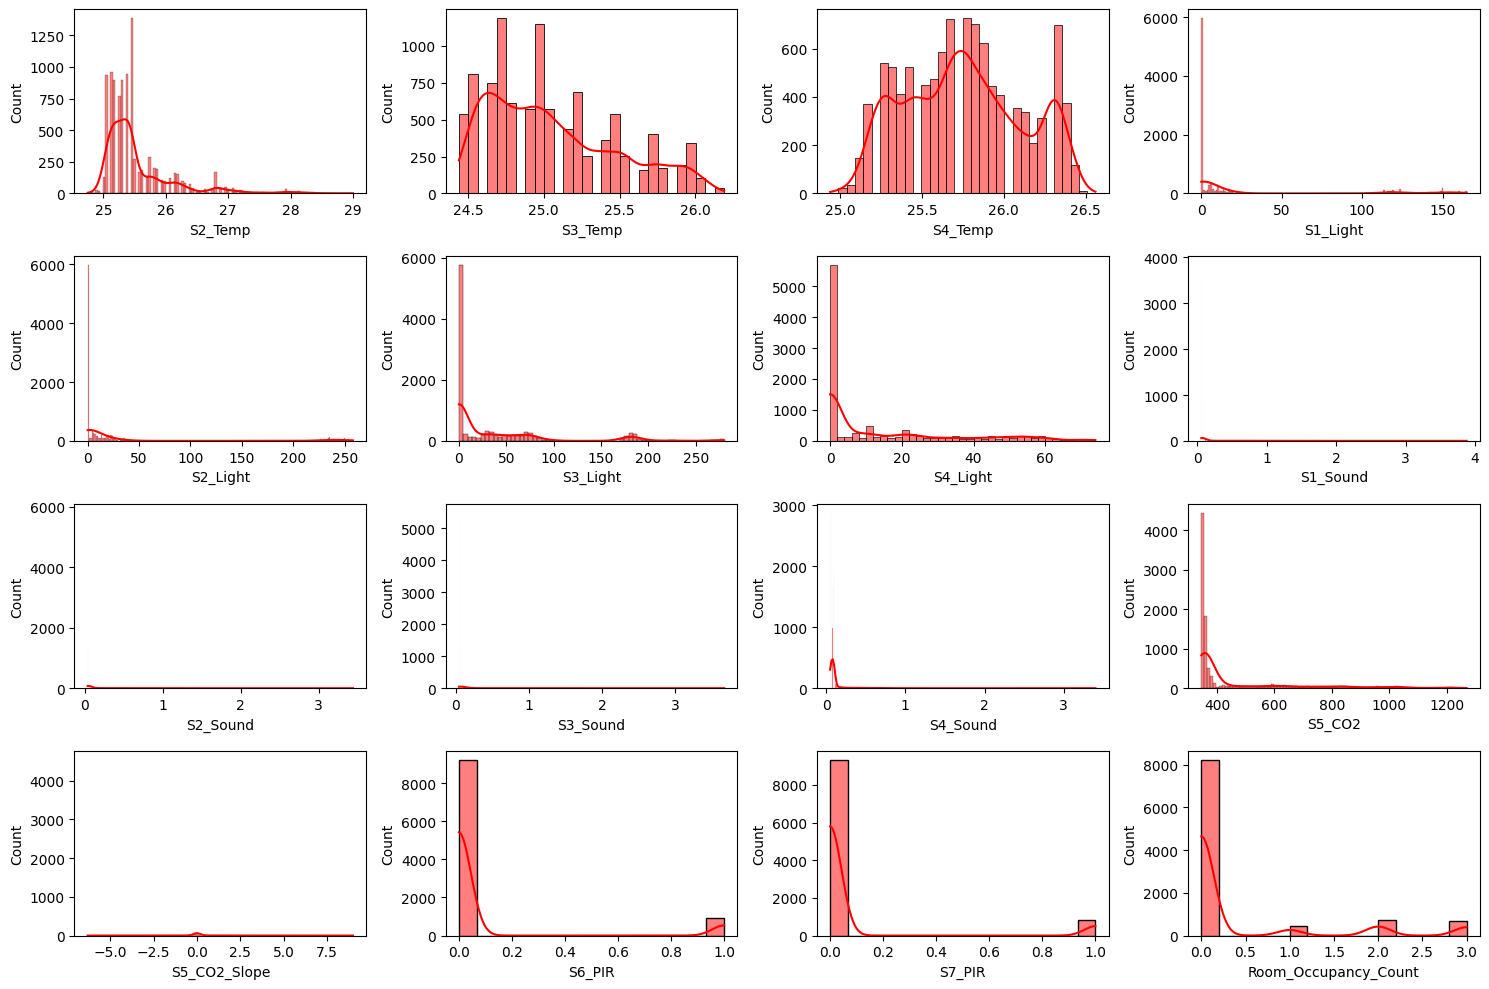

In [42]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(15, 10))

columnas = data.columns.tolist()
columnas = columnas[3:]
print(len(columnas))

for i, columna in enumerate(columnas):
    fila = i // 4
    col = i % 4
    sns.histplot(data[columna], kde = True,color='r',ax=axes[fila, col])
plt.tight_layout()

plt.show()


In [43]:
# Se quitan las columnas categoricas 
data_n = data.drop(["Date","Time",'S6_PIR','S7_PIR','Room_Occupancy_Count','S1_Sound','S2_Sound','S3_Sound','S4_Sound'], axis=1)
data_n

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S5_CO2,S5_CO2_Slope
0,24.94,24.75,24.56,25.38,121,34,53,40,390,0.769231
1,24.94,24.75,24.56,25.44,121,33,53,40,390,0.646154
2,25.00,24.75,24.50,25.44,121,34,53,40,390,0.519231
3,25.00,24.75,24.56,25.44,121,34,53,40,390,0.388462
4,25.00,24.75,24.56,25.44,121,34,54,40,390,0.253846
...,...,...,...,...,...,...,...,...,...,...
10124,25.06,25.13,24.69,25.31,6,7,33,22,345,0.000000
10125,25.06,25.06,24.69,25.25,6,7,34,22,345,0.000000
10126,25.13,25.06,24.69,25.25,6,7,34,22,345,0.000000
10127,25.13,25.06,24.69,25.25,6,7,34,22,345,0.000000


## Matriz de correlación

<Figure size 1500x1000 with 0 Axes>

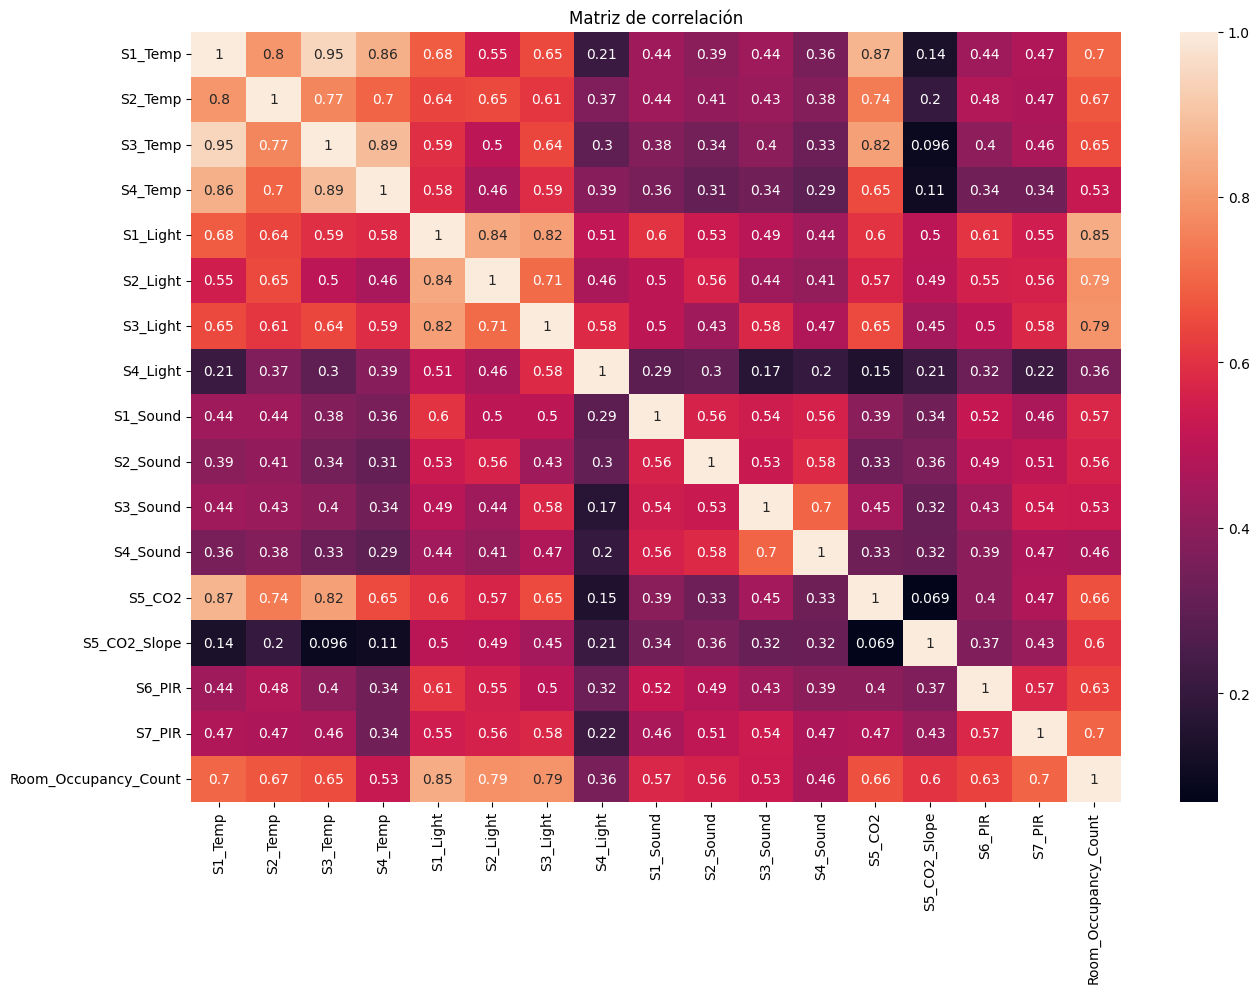

In [44]:
plt.figure(figsize=(15,10))
col = data.columns.tolist()

plt.figure(figsize=(15,10))
sns.heatmap(data[col[2:]].corr(),fmt='.2g',annot=True)
plt.title("Matriz de correlación")
plt.show()

## Estandarización de datos

In [45]:
scaler =StandardScaler()
df_estand = scaler.fit_transform(data_n)
df_estand = pd.DataFrame(df_estand, columns=data_n.columns)
df_estand

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S5_CO2,S5_CO2_Slope
0,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.354382,0.664469
1,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,-0.354382,0.558817
2,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,-0.354382,0.449864
3,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,-0.354382,0.337609
4,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,-0.354382,0.222053
...,...,...,...,...,...,...,...,...,...,...
10124,-1.121477,-0.709639,-0.858071,-1.246084,-0.381210,-0.282556,-0.021379,0.447917,-0.579432,0.004146
10125,-1.121477,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.579432,0.004146
10126,-0.922236,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.579432,0.004146
10127,-0.922236,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.579432,0.004146


## Reducción de dimensionalidades

In [48]:
pca = PCA(n_components=6)
p_components  = pca.fit(df_estand)
loadings = pca.components_
for i, pc_loadings in enumerate(loadings):
    print(f"Loadings for PC{i + 1}:")
    for j, variable_loading in enumerate(pc_loadings):
        print(f"{df_estand.columns.tolist()[j]} {j + 1}: {variable_loading:.4f}")

Loadings for PC1:
S1_Temp 1: 0.3637
S2_Temp 2: 0.3446
S3_Temp 3: 0.3553
S4_Temp 4: 0.3333
S1_Light 5: 0.3471
S2_Light 6: 0.3170
S3_Light 7: 0.3431
S4_Light 8: 0.2015
S5_CO2 9: 0.3347
S5_CO2_Slope 10: 0.1427
Loadings for PC2:
S1_Temp 1: 0.2879
S2_Temp 2: 0.1201
S3_Temp 3: 0.3024
S4_Temp 4: 0.2419
S1_Light 5: -0.2730
S2_Light 6: -0.3152
S3_Light 7: -0.2290
S4_Light 8: -0.3551
S5_CO2 9: 0.2747
S5_CO2_Slope 10: -0.5699
Loadings for PC3:
S1_Temp 1: -0.1276
S2_Temp 2: -0.0137
S3_Temp 3: 0.0277
S4_Temp 4: 0.1894
S1_Light 5: -0.0705
S2_Light 6: -0.1451
S3_Light 7: 0.0799
S4_Light 8: 0.7962
S5_CO2 9: -0.2085
S5_CO2_Slope 10: -0.4869
Loadings for PC4:
S1_Temp 1: -0.1256
S2_Temp 2: 0.1545
S3_Temp 3: -0.2511
S4_Temp 4: -0.5010
S1_Light 5: 0.1690
S2_Light 6: 0.4536
S3_Light 7: 0.0493
S4_Light 8: -0.0381
S5_CO2 9: 0.3407
S5_CO2_Slope 10: -0.5404
Loadings for PC5:
S1_Temp 1: -0.0428
S2_Temp 2: 0.6877
S3_Temp 3: -0.0617
S4_Temp 4: 0.0793
S1_Light 5: -0.1404
S2_Light 6: 0.2574
S3_Light 7: -0.5836
S4_Li

### Varianza explicada para selección de número de componente

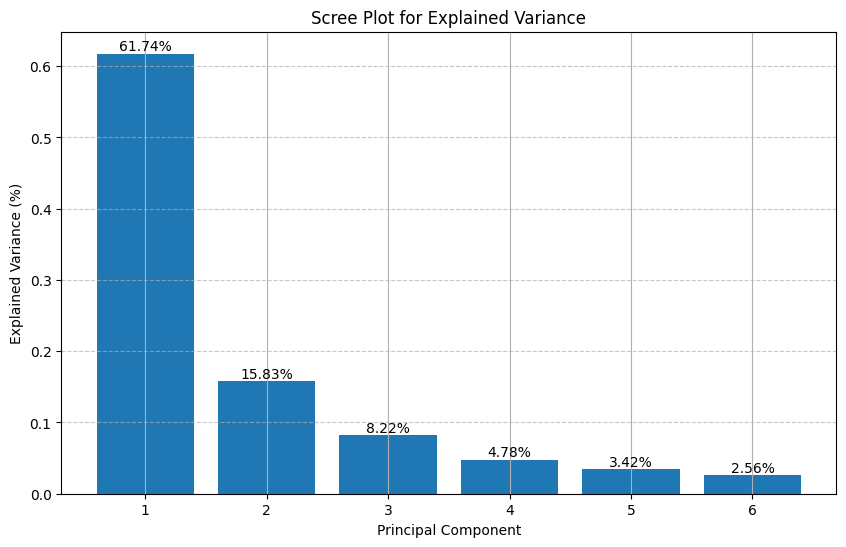

In [50]:
explained_variance = pca.explained_variance_ratio_

plt.figure (figsize=(10,6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot for Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)

# Add labels on top of each bin
for i, ratio in enumerate(explained_variance):
    plt.text(i + 1, ratio, f'{ratio:.2%}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Detección de datos atípicos

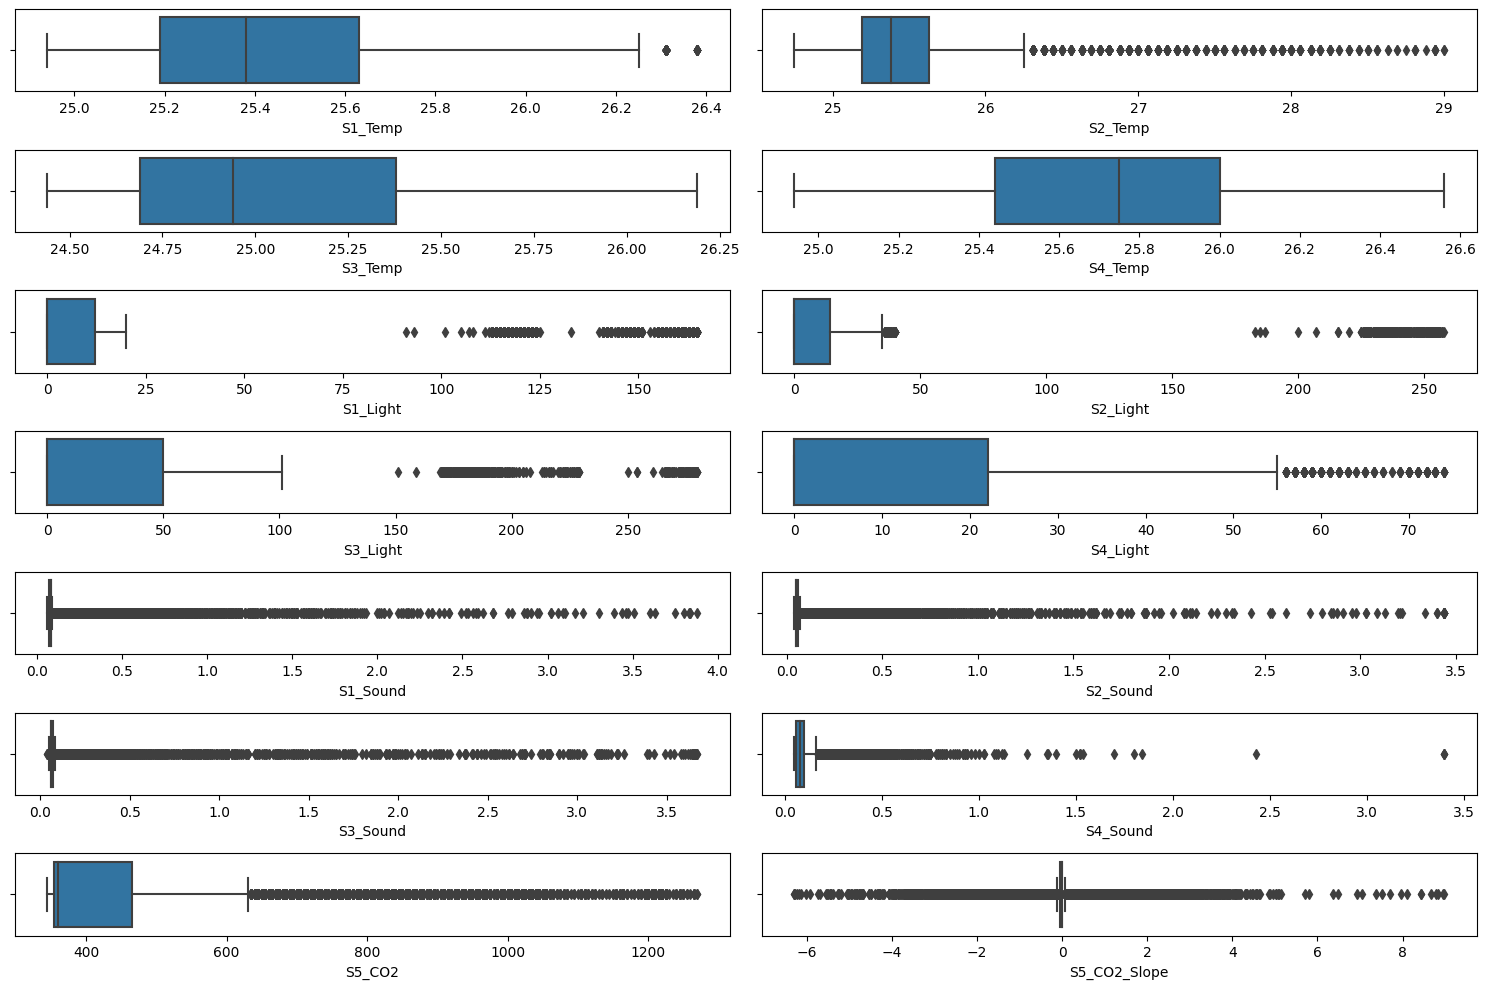

In [ ]:
int_vars = data.select_dtypes(include = ['int','float'])
int_vars = data.columns.tolist()[2:-3]
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate(int_vars):
    sns.boxplot(x=var,data=data,ax=axs[i])
    #axs[i].set_title(var)

plt.tight_layout()
plt.show()

In [55]:
data_pca = pca.transform(df_estand[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S5_CO2', 'S5_CO2_Slope']])
data_pca=pd.DataFrame(data_pca, columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])

In [57]:
data_final = pd.concat((data['Room_Occupancy_Count'],data_pca), axis=1)
data_final

,Room_Occupancy_Count,PC1,PC2,PC3,PC4,PC5,PC6
0,1,-0.713390,-2.773214,0.688756,0.646038,-1.031680,-0.562395
1,1,-0.677058,-2.667593,0.774247,0.612059,-1.033474,-0.646117
2,1,-0.675677,-2.603479,0.799456,0.691484,-1.039950,-0.696845
3,1,-0.641794,-2.497039,0.858007,0.716892,-1.060635,-0.723439
4,1,-0.652403,-2.435101,0.915641,0.780183,-1.083000,-0.746786
...,...,...,...,...,...,...,...
10124,0,-1.704936,-1.091548,0.434588,0.460483,-0.303108,0.427259
10125,0,-1.796313,-1.150532,0.405702,0.527216,-0.408552,0.444672
10126,0,-1.723851,-1.093172,0.380273,0.502191,-0.417074,0.425293
10127,0,-1.723851,-1.093172,0.380273,0.502191,-0.417074,0.425293


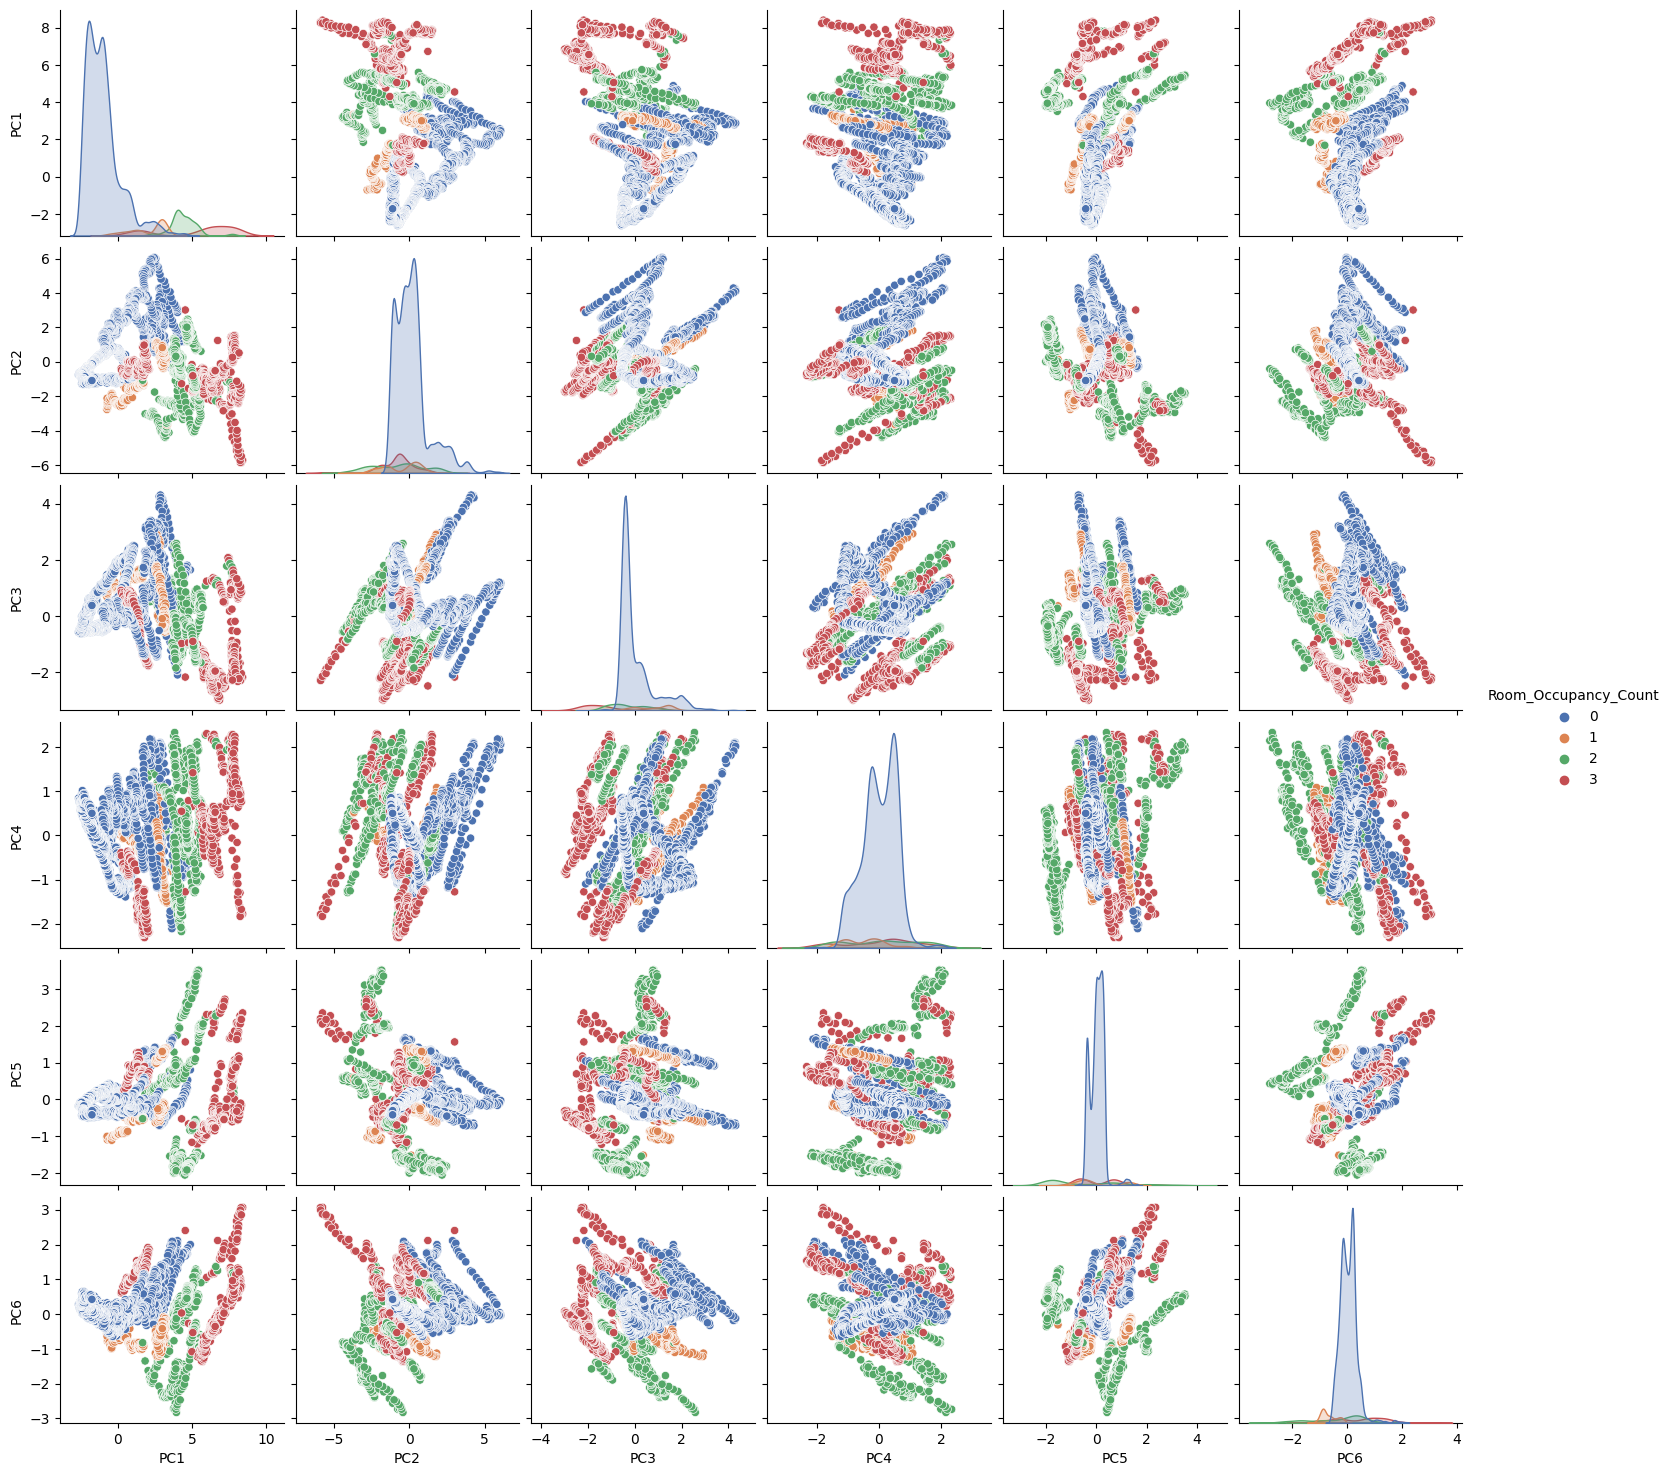

In [61]:
sns.pairplot(data_final, hue='Room_Occupancy_Count', palette='deep')
plt.show()

### **Cálculo de métricas de evaluación**
_________________________

<p align="center">
  <img src="https://www.tutorialexample.com/wp-content/uploads/2022/01/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png" alt="Matriz de confusión">
</p>